Dependencies: gym,gym-anytrading,baseline

In [ ]:
! pip install gym-anytrading gym stable-baselines3 tensorflow shimmy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import gym
import gym_anytrading as tr
import numpy as np
import pandas as pd
from pylab import plt
import yfinance as yf

In [ ]:
df = yf.download('0066.HK',start="2022-01-01",end="2023-08-01")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,41.950001,42.349998,41.900002,42.150002,39.791771,1761872
2022-01-04,42.099998,42.349998,41.500000,42.299999,39.933376,2910078
2022-01-05,42.349998,42.799999,42.250000,42.700001,40.310997,4416855
2022-01-06,42.750000,42.799999,42.000000,42.349998,39.980579,1457827
2022-01-07,42.250000,42.500000,41.900002,42.500000,40.122189,2066317
...,...,...,...,...,...,...
2023-07-25,35.500000,35.700001,35.200001,35.500000,35.500000,2559529
2023-07-26,35.500000,36.200001,35.500000,35.650002,35.650002,1984591
2023-07-27,35.599998,36.200001,35.549999,36.099998,36.099998,2586744


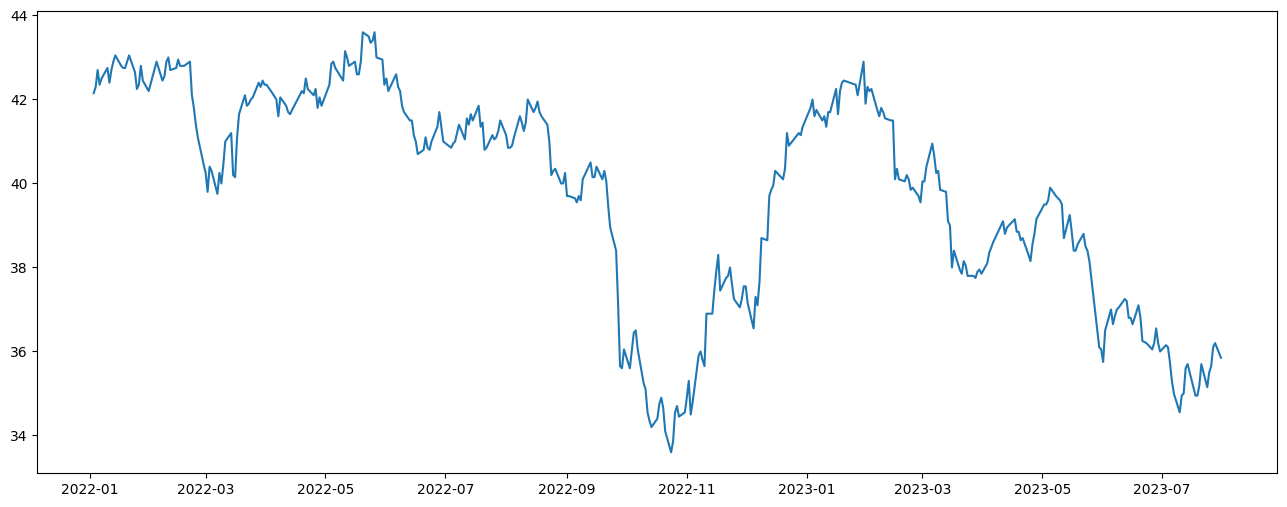

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(df['Close'])
plt.show()

建立交易环境  

In [ ]:
window_size = 5
env = gym.make('stocks-v0',df=df,frame_bound=(window_size,len(df)),window_size=window_size) ##read 10-days' prices as one state
state = env.reset()
state ##first 10 days closed prices,diffs with prev day's closed price

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)
  logger.warn(


array([[42.29999924,  0.14999771],
       [42.70000076,  0.40000153],
       [42.34999847, -0.35000229],
       [42.5       ,  0.15000153],
       [42.75      ,  0.25      ]])

In [ ]:
while True:
  action = env.action_space.sample()
  observation,reward,done,info = env.step(action)
  if done:
    print('info: ',info)
    break


info:  {'total_reward': -0.7000045776367188, 'total_profit': 0.1991428949698089, 'position': 1}


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(


画出这次交易的过程，绿色是long,红色是short

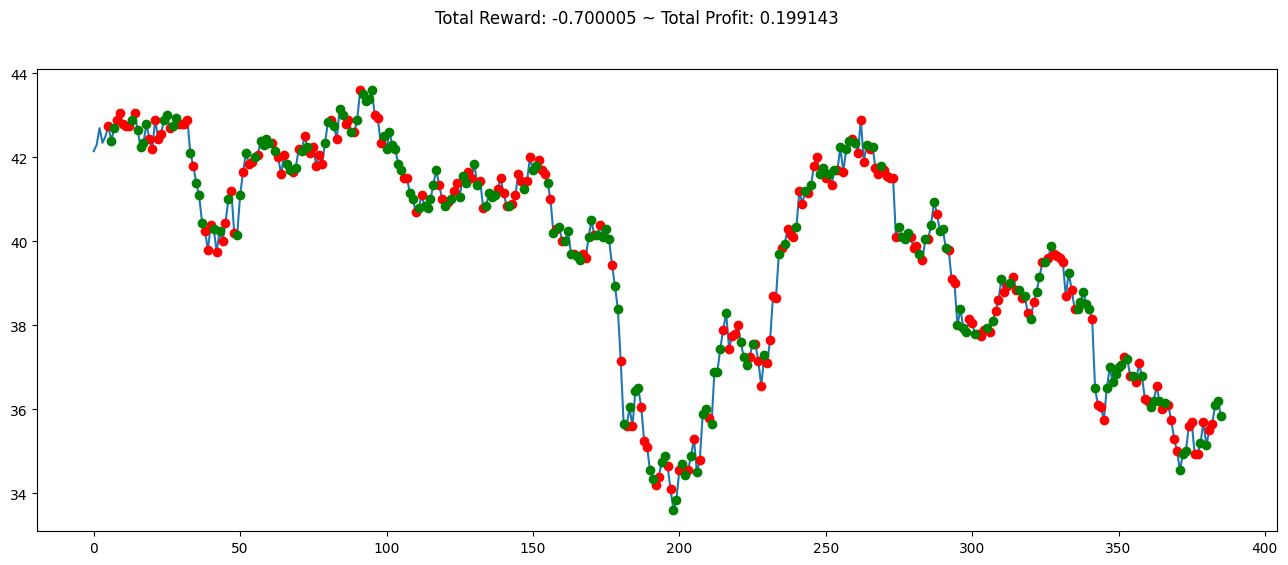

In [ ]:
plt.figure(figsize=(16,6))
plt.cla()
env.render_all()
plt.show()

In [ ]:
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


创建适合模型的环境

In [ ]:
env_maker = lambda: gym.make('stocks-v0',df=df,frame_bound=(window_size,len(df)),window_size=window_size)
env = DummyVecEnv([env_maker])

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/stable_

训练模型

In [ ]:
model = A2C('MlpPolicy',env,verbose = 1)

Using cpu device


In [ ]:
model.learn(total_timesteps=2000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require tha

------------------------------------
| time/                 |          |
|    fps                | 479      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0.000414 |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.169    |
|    value_loss         | 0.146    |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 513       |
|    iterations         | 200       |
|    time_elapsed       | 1         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -0.686    |
|    explained_variance | -0.000442 |
|    learning_rate      | 0.0007    |
|    n_updates          | 199       |
|    policy_loss        | 0.34      |
|    value_loss         | 

In [ ]:
env = gym.make('stocks-v0',df=df,frame_bound=(len(df)-50,len(df)),window_size=window_size)
state = env.reset()
while True:
  state = state[np.newaxis,...]
  action,_states = model.predict(state)
  state,rewards,done,info = env.step(action)
  if done:
    print('info: ',info)
    break

info:  {'total_reward': -0.25, 'total_profit': 0.79775388945029, 'position': 1}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/loc

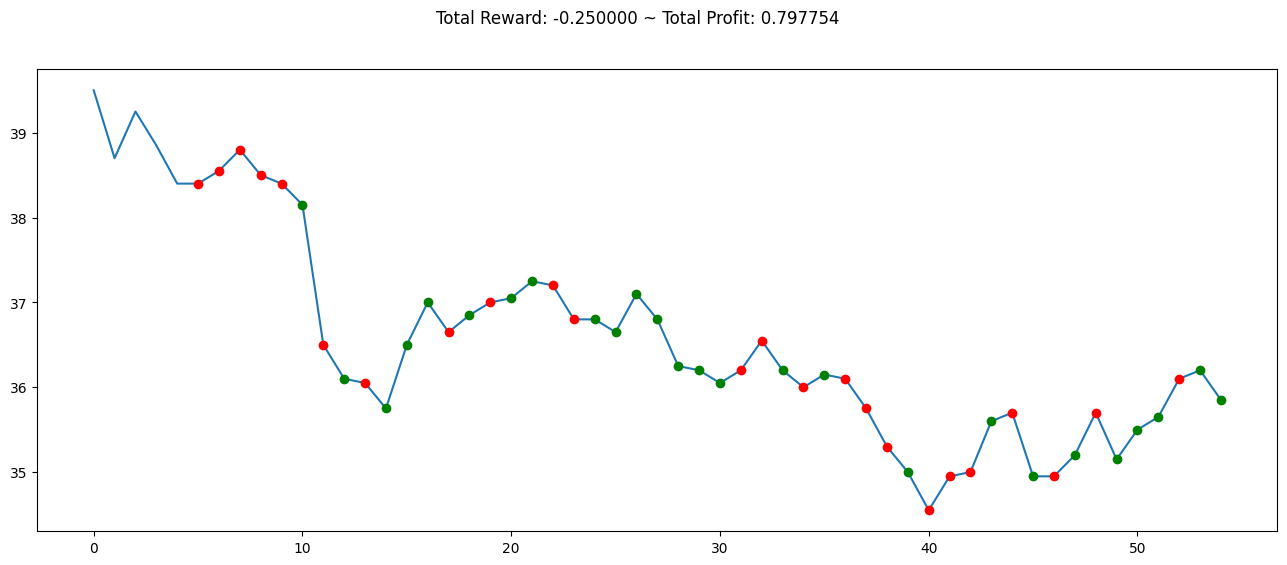

In [ ]:
plt.figure(figsize=(16,6))
env.render_all()
plt.show()